# Minimal Left Right Symmetric models with Higgs doublets

In this notebook we study the gauge-Higgs sector

In [1]:
from sympy import symbols, init_printing, I, eye, conjugate
from sympy import Matrix, KroneckerDelta
from sympy.physics.quantum import Dagger
init_printing()

# Yukawa interactions

In [2]:
from potential_senjanovic_HiggsDoublets import ChiL, ChiR, Phi, Phitilde, PhiDagger, PhitildeDagger, k1, k2, vL, vR
from potential_senjanovic_HiggsDoublets import complex_scalar_fields, vevL, vevR, vevPhi, change_scalar_fields

In [3]:
from sympy import IndexedBase, Idx
i, j, k, l, m, n = symbols('i, j, k, l, m, n', cls=Idx)

In [4]:
Y = IndexedBase('Y')
Ytilde = IndexedBase(r'\tilde{Y}')
YL = IndexedBase('Y_L')
YR = IndexedBase('Y_R')
h = IndexedBase('h')
htilde = IndexedBase(r'\tilde{h}')
mu = IndexedBase(r'\mu')

## Lepton doublets

In [5]:
lLp = IndexedBase(r'\ell_L^{\prime}')
lRp = IndexedBase(r'\ell_R^{\prime}')
nuLp = IndexedBase(r'\nu_L^{\prime}')
nuRp = IndexedBase(r'\nu_R^{\prime}')
Singlet = IndexedBase('S')
SingletC = IndexedBase(r'S^c')

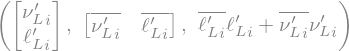

In [6]:
def LL(idx):
    return Matrix(
        [
            [nuLp[idx]],
            [lLp[idx]]
        ]
    )

def LR(idx):
    return Matrix(
        [
            [nuRp[idx]],
            [lRp[idx]]
        ]
    )

LL(i), Dagger(LL(i)), (Dagger(LL(i))*LL(i))[0]

### Charged leptons
$$\mathcal{L_{yuk}} = -\overline{L_{iL}}\left(h_{ij}\Phi+\tilde{h}_{ij}\tilde{\Phi}\right)L_{jR}$$

$$-\overline{L}_{iR}Y_{ij}\Phi^{\dagger}L_{jL}-\overline{L}_{iR}\tilde{Y}_{ij}\tilde{\Phi}^{\dagger}L_{jL}-\overline{S}_{i}Y_{ijL}\tilde{\chi}_{L}^{\dagger}L_{jL}-\overline{S}_{i}^{c}Y_{ijR}\tilde{\chi}_{R}^{\dagger}L_{jR}-\frac{1}{2}\overline{S}_{i}^{c}\mu_{ij}S_{j}+\text{h.c.}$$

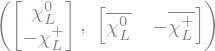

In [7]:
from sympy.physics import msigma

ChiLtilde = I*msigma(2)*ChiL
ChiRtilde = I*msigma(2)*ChiR
ChiLtildeDagger = Dagger(ChiLtilde)
ChiRtildeDagger = Dagger(ChiRtilde)
ChiLtilde, ChiLtildeDagger

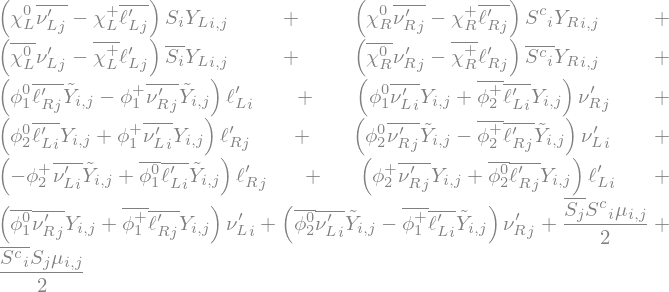

In [8]:
Lyuk_lep = (
    (Dagger(LL(i))*Y[i, j]*Phi*LR(j))[0] + 
    (Dagger(LL(i))*Ytilde[i, j]*Phitilde*LR(j))[0] +
    (Dagger(LR(j))*Y[i, j]*PhiDagger*LL(i))[0] + 
    (Dagger(LR(j))*Ytilde[i, j]*PhitildeDagger*LL(i))[0] +
    conjugate(Singlet[i])*YL[i,j]*(ChiLtildeDagger*LL(j))[0] +
    (Dagger(LL(j))*ChiLtilde)[0]*YL[i,j]*Singlet[i] + 
    conjugate(SingletC[i])*YR[i,j]*(ChiRtildeDagger*LR(j))[0] +
    (Dagger(LR(j))*ChiRtilde)[0]*YR[i,j]*SingletC[i] + 
    mu[i,j]/2*conjugate(SingletC[i])*Singlet[j] + 
    mu[i,j]/2*conjugate(Singlet[j])*SingletC[i]
)
Lyuk_lep

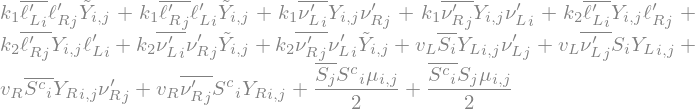

In [9]:
Lyuk_lep_vev = Lyuk_lep.subs(vevPhi).subs(vevL).subs(vevR).expand()
Lyuk_lep_vev

In [10]:
Ml = Lyuk_lep_vev.coeff(conjugate(lLp[i])).coeff(lRp[j])
Ml

In [11]:
Ml_sym = IndexedBase(r'M_\ell')
Ml_sym[i,j]

In [12]:
def Ml_expr(idx1, idx2):
    Ml = k1*Ytilde[idx1, idx2] + k2*Y[idx1, idx2]
    return Ml
Ml_expr(i,j)

In [13]:
VlL = IndexedBase('V_{L}^\ell')
VlR = IndexedBase('V_{R}^\ell')

In [14]:
def Ml_diag_expr(idx1, idx2, idx3, idx4):
    Ml_diag = conjugate(VlL[idx2, idx1])*Ml_sym[idx2, idx3]*VlR[idx3, idx4]
    return Ml_diag

Ml_diag_expr(m, k, l, n)

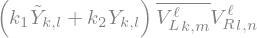

In [15]:
Ml_diag_expr(m, k, l, n).subs(Ml_sym[k, l], Ml_expr(k, l))

In [16]:
lL = IndexedBase(r'\ell_L')
lR = IndexedBase(r'\ell_R')
nL = IndexedBase(r'n_L')
nR = IndexedBase(r'n_R')

In [17]:
def lLp_expr(idx1, idx2):
    return VlL[idx1,idx2]*lL[idx2]
def lRp_expr(idx1, idx2):
    return VlR[idx1,idx2]*lR[idx2]

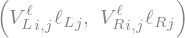

In [18]:
lLp_expr(i,j), lRp_expr(i,j)

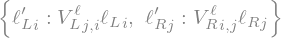

In [19]:
def change_charged_leptons(idx1, idx2):
    return {
        lLp[idx1]: lLp_expr(idx2, idx1),
        lRp[idx2]: lRp_expr(idx1, idx2)
    }
change_charged_leptons(i,j)

In [20]:
Lyuk_lep_massbasis = Lyuk_lep.subs(change_charged_leptons(i,j)).expand().coeff(conjugate(lL[i])).coeff(lR[j]).subs(vevPhi)
Lyuk_lep_massbasis

If $$V_L^\ell = V_R^\ell = V^\ell$$

In [21]:
Vl = IndexedBase('V^\ell')

if $V^\ell = \mathbf{1}$, then,
$$\overline{{V^{\ell}}_{j,i}} {V^{\ell}}_{i,j} = \delta_{i,j} $$

In [22]:
Lyuk_lep_massbasis.replace(VlL, Vl).subs(VlR, Vl).subs(conjugate(Vl[j, i])*Vl[i,j], KroneckerDelta(i,j))

#### Leptons interaction with scalars

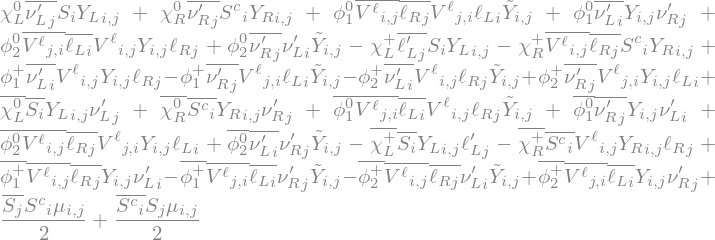

In [23]:
Lyuk_charged_lep_basis = Lyuk_lep.subs(change_charged_leptons(i,j)).expand().replace(VlL, Vl).subs(VlR, Vl)
Lyuk_charged_lep_basis

In [24]:
Lyuk_charged_leptons_physical_basis = 0
for term in Lyuk_charged_lep_basis.args:
    if term.has(lL) and term.has(lR) and not(term.has(nuLp) or term.has(nuRp)):
        Lyuk_charged_leptons_physical_basis += term

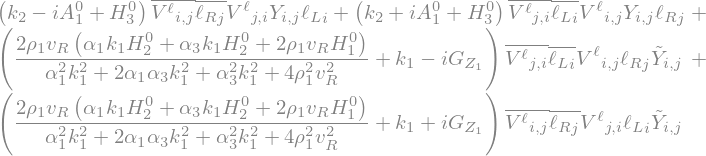

In [25]:
Lyuk_charged_leptons_physical_basis.subs(complex_scalar_fields).subs(change_scalar_fields)

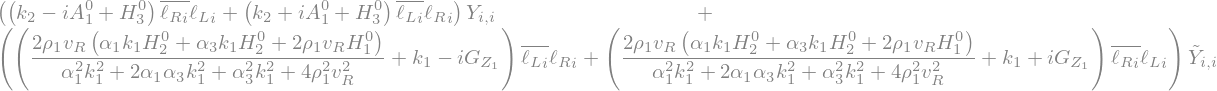

In [26]:
Lyuk_charged_leptons_physical_basis.subs(complex_scalar_fields).subs(change_scalar_fields).replace(VlL, Vl).subs(VlR, Vl).subs(
    conjugate(Vl[j, i]), KroneckerDelta(i,j)/Vl[i,j]
).subs(
    conjugate(Vl[i, j])*Vl[j,i], KroneckerDelta(i,j)
).subs(j,i).collect([Y[i,i], Ytilde[i,i]])

### Neutrino sector

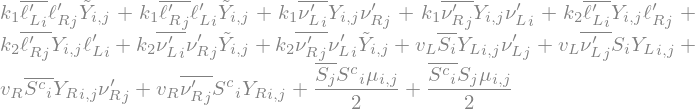

In [155]:
Lyuk_lep_vev

In [156]:
mD = Lyuk_lep_vev.coeff(conjugate(nuLp[i])).coeff(nuRp[j])
mD

In [161]:
mDp = Lyuk_lep_vev.coeff(conjugate(Singlet[i])).coeff(nuLp[j])
mDp

In [162]:
MD = Lyuk_lep_vev.coeff(conjugate(SingletC[i])).coeff(nuRp[j])
MD

In [163]:
Ml

In [164]:
mD_sym = IndexedBase('m_D')
mDp_sym = IndexedBase('m_D^\prime')
MD_sym = IndexedBase('M_D')

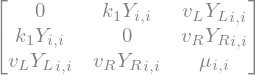

In [166]:
Mnu1 = Matrix(
    [
        [0, mD, mDp],
        [mD, 0, MD],
        [mDp, MD, mu[i,j]]
    ]
).subs(k2, 0).subs(j, i)
Mnu1

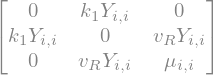

In [172]:
Mnu1Y = Mnu1.replace(YL[i,i], 0).replace(YR, Y)
Mnu1Y

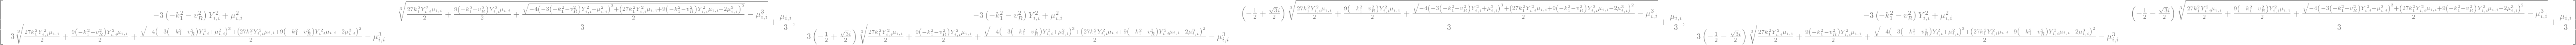

In [173]:
eigenvals1Y = list(Mnu1Y.eigenvals().keys())
eigenvals1Y

In [174]:
#epsilonL = symbols('epsilon_L')
epsilon1 = symbols('epsilon_1')
epsilon = symbols('epsilon')

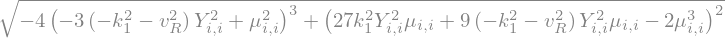

In [181]:
sqrt_iss = eigenvals1Y[0].args[0].args[1].args[0].args[0].args[1]
sqrt_iss

In [182]:
from symbolic_tools import multivariable_taylor_optimized

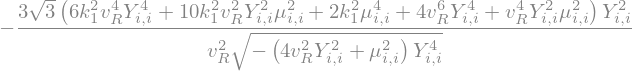

In [183]:
multivariable_taylor_optimized(
    sqrt_iss.subs(k1, epsilon1*vR), [epsilon1], [0], 2
).subs(epsilon1, k1/vR).factor()

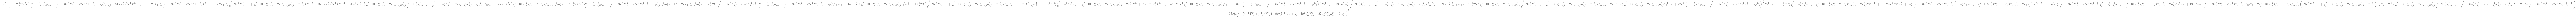

In [184]:
multivariable_taylor_optimized(
    eigenvals1Y[0].subs(k1, epsilon1*vR), [epsilon1], [0], 2
).subs(epsilon1, k1/vR).factor()

In [395]:
from sympy import Eq, solve

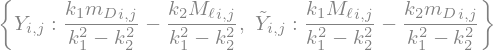

In [396]:
YYtilde_sol = solve([Eq(Ml_sym[i,j], Ml), Eq(mD_sym[i,j], mD)], [Y[i,j], Ytilde[i,j]], dict=True)[0]
YYtilde_sol

In [397]:
for y in YYtilde_sol:
    YYtilde_sol[y] = YYtilde_sol[y].simplify()

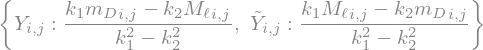

In [398]:
YYtilde_sol

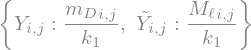

In [400]:
YYtilde_sol_k2_0 = {}
for y in YYtilde_sol:
    YYtilde_sol_k2_0[y] = YYtilde_sol[y].subs(k2,0)

YYtilde_sol_k2_0

## Covariant derivative

In [64]:
from Gauge_Higgs_senjanovic_HiggsDoublets import WsigmaL, WsigmaR, partial_mu, Bmu, g, gBL

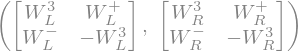

In [65]:
WsigmaL, WsigmaR

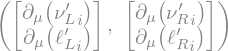

In [47]:
def partial_mu_LL(idx):
    return Matrix(
        [
            [partial_mu(nuLp[idx])],
            [partial_mu(lLp[idx])]
        ]
    )
def partial_mu_LR(idx):
    return Matrix(
        [
            [partial_mu(nuRp[idx])],
            [partial_mu(lRp[idx])]
        ]
    )
partial_mu_LL(i), partial_mu_LR(i)

In [48]:
DmuL = - I*g/2*WsigmaL + I*gBL/2*Bmu*eye(2)
DmuR = - I*g/2*WsigmaR + I*gBL/2*Bmu*eye(2)

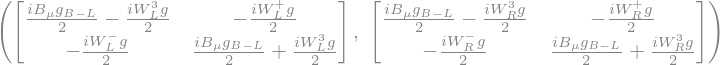

In [49]:
DmuL, DmuR

In [66]:
def Dmu_LL(idx):
    return partial_mu_LL(idx) +  DmuL*LL(idx) 
def Dmu_LR(idx):
    return partial_mu_LR(idx) + DmuR*LR(idx)

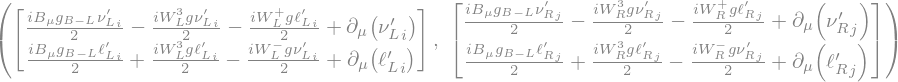

In [68]:
Dmu_LL(i).applyfunc(lambda x:x.expand()), Dmu_LR(j).applyfunc(lambda x:x.expand())

In [52]:
from Gauge_Higgs_senjanovic_HiggsDoublets import WLp, WRp, WLm, WRm

In [53]:
conjugate_fields = {
    conjugate(WLp):WLm,
    conjugate(WLm):WLp,
    conjugate(WRm):WRp,
    conjugate(WRp):WRm,
    #conjugate(chiL0): chiL0,
    #conjugate(partial_mu(chiRp)): partial_mu(chiRm)
}

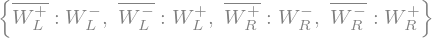

In [54]:
conjugate_fields

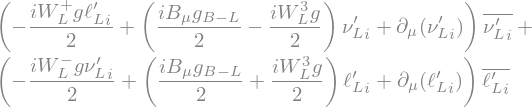

In [55]:
def LL_Dmu_LL(idx):
    return (Dagger(LL(idx))*Dmu_LL(idx))[0]
LL_Dmu_LL(i)


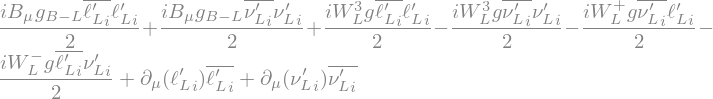

In [56]:
LL_Dmu_LL(i).expand()

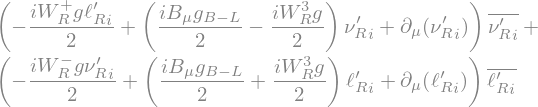

In [57]:
def LR_Dmu_LR(idx):
    return (Dagger(LR(idx))*Dmu_LR(idx))[0]
LR_Dmu_LR(i)

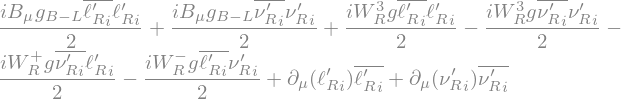

In [58]:
LR_Dmu_LR(i).expand()

## Kinetic Lagrangian of scalars

In [59]:
gamma = symbols(r'\gamma')

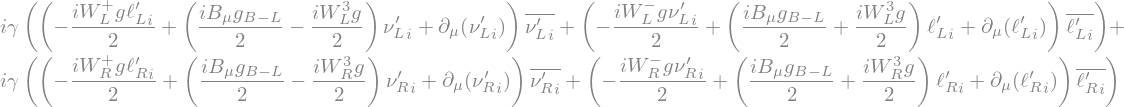

In [60]:
Lag_leptons = I*gamma*LL_Dmu_LL(i) + I*gamma*LR_Dmu_LR(i)
Lag_leptons

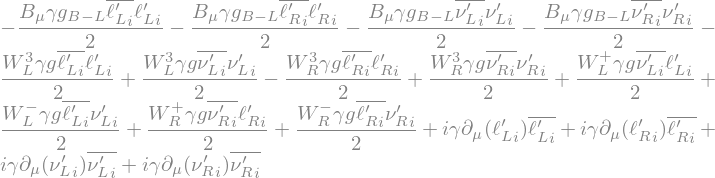

In [61]:
Lag_leptons.expand()

In [62]:
from symbolic_tools import PL, PR

In [63]:
PL*PL, PL*PR, PL + PR